# Credit Card Fraud Detection
Build a machine learning model to identify fraudulent credit card transactions.  
Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.  
Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.  
Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.  

## Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
#For Data Analysis
import numpy as np
import pandas as pd
#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset from csv into a python pandas dataframe
data = pd.read_csv(r"C:\Users\Devesh jain\OneDrive\Desktop\datsets\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# Data Visualization

In [10]:
corr = data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: >

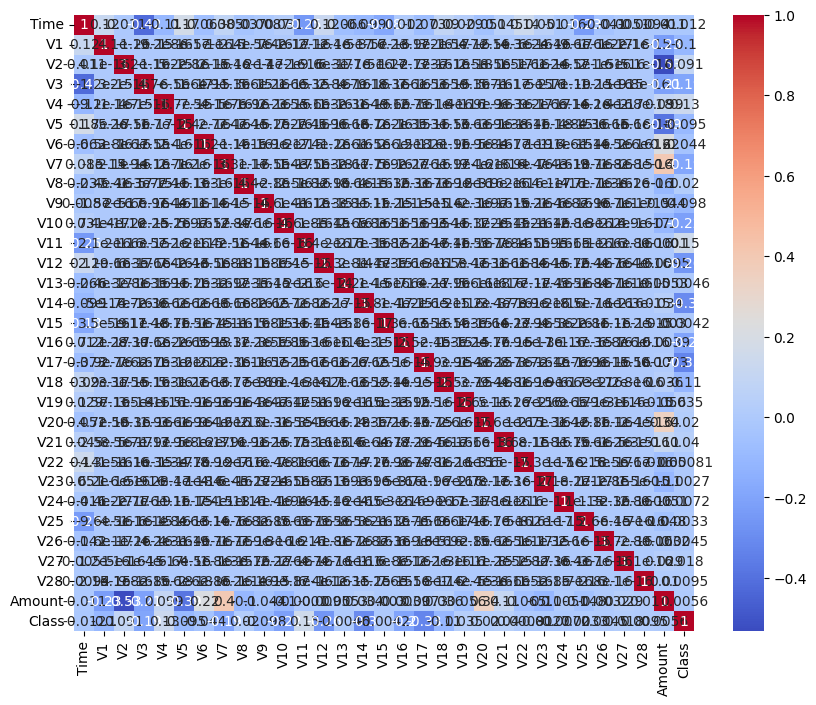

In [11]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, cmap = "coolwarm")

In [12]:
cov = data.cov()
cov

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,2.255124e+09,1.091960e+04,-8.307031e+02,-3.021425e+04,-7.077378e+03,1.134407e+04,-3.986868e+03,4.976739e+03,-2.095683e+03,-4.518322e+02,...,1.560435e+03,4.964595e+03,1.516599e+03,-4.654076e+02,-5.769855e+03,-9.482254e+02,-9.841860e+01,-1.475443e+02,-125860.970747,-24.300717
V1,1.091960e+04,3.836489e+00,-3.704325e-16,-1.737200e-15,-7.153178e-16,8.047326e-16,3.704325e-16,1.788295e-16,-1.405089e-16,1.341221e-16,...,-1.508874e-16,1.229453e-16,2.426971e-16,-5.788007e-17,-2.746310e-16,-1.205502e-16,7.344781e-17,2.107633e-16,-111.556566,-0.008244
V2,-8.307031e+02,-3.704325e-16,2.726820e+00,1.532824e-16,-3.576589e-16,2.426971e-16,8.482424e-16,-2.714376e-16,-6.386766e-17,-2.011831e-16,...,9.260811e-17,1.939980e-16,1.117684e-16,-1.061800e-16,1.181552e-16,2.067716e-16,-3.321119e-16,-2.091666e-16,-219.485433,0.006260
V3,-3.021425e+04,-1.737200e-15,1.532824e-16,2.299029e+00,-5.045545e-16,-1.213486e-15,2.883825e-15,4.981678e-16,-1.532824e-16,1.788295e-16,...,-1.892080e-16,-2.554707e-16,-6.306932e-17,1.676526e-17,8.781804e-17,-1.708460e-16,3.129516e-16,3.592556e-16,-79.975549,-0.012150
V4,-7.077378e+03,-7.153178e-16,-3.576589e-16,-5.045545e-16,2.004684e+00,-3.621297e-15,-7.887657e-16,-7.025443e-17,1.072977e-15,9.420481e-16,...,-7.544368e-17,2.423229e-16,1.916030e-16,1.391617e-16,4.774108e-16,-2.707390e-16,-6.227097e-17,-3.742246e-18,34.964556,0.007846
V5,1.134407e+04,8.047326e-16,2.426971e-16,-1.213486e-15,-3.621297e-15,1.905081e+00,1.114491e-15,2.315203e-17,8.238929e-16,7.089311e-16,...,-5.588421e-17,2.235368e-17,9.180977e-17,-8.007408e-16,-7.983458e-17,2.315203e-16,2.466889e-16,-8.103210e-17,-133.380790,-0.005444
V6,-3.986868e+03,3.704325e-16,8.482424e-16,2.883825e-15,-7.887657e-16,1.114491e-15,1.774946e+00,-3.193383e-17,-5.652288e-16,-1.341221e-16,...,-8.023375e-17,-1.077767e-16,2.714376e-17,-8.557269e-16,3.752225e-16,-1.640601e-16,-7.564327e-17,1.943972e-16,71.970931,-0.002415
V7,4.976739e+03,1.788295e-16,-2.714376e-16,4.981678e-16,-7.025443e-17,2.315203e-17,-3.193383e-17,1.530401e+00,3.193383e-17,-1.596692e-17,...,7.983458e-18,-5.867842e-16,-2.075699e-16,-4.540592e-18,3.193383e-18,-4.614439e-16,-9.739819e-17,2.554707e-17,122.936845,-0.009620
V8,-2.095683e+03,-1.405089e-16,-6.386766e-17,-1.532824e-16,1.072977e-15,8.238929e-16,-5.652288e-16,3.193383e-17,1.426479e+00,5.460685e-16,...,5.588421e-17,2.484851e-17,1.365171e-16,-1.536816e-16,-1.029866e-16,2.195451e-18,1.622638e-16,-2.251335e-16,-30.792991,0.000986
V9,-4.518322e+02,1.341221e-16,-2.011831e-16,1.788295e-16,9.420481e-16,7.089311e-16,-1.341221e-16,-1.596692e-17,5.460685e-16,1.206992e+00,...,1.935989e-16,-1.261386e-16,-7.344781e-17,-1.856154e-16,1.245419e-16,-4.151398e-17,-7.105278e-17,2.901987e-16,-12.158248,-0.004459


# Data Preparation

In [13]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [14]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Model Building

In [17]:
legit_sample = legit.sample(n = 492)

In [18]:
data2 = pd.concat([legit_sample, fraud], axis = 0)
data2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
49032,43883.0,-0.343163,1.167285,1.300429,0.058078,0.060531,-0.961062,0.767344,-0.106522,-0.480824,...,-0.255557,-0.643766,-0.013344,0.348937,-0.140639,0.069874,0.248108,0.099650,7.14,0
150840,94057.0,1.984549,0.267650,-1.955637,1.276264,0.859853,-0.800603,0.602020,-0.345378,0.995017,...,0.075148,0.384207,-0.036224,0.680489,0.471032,-0.509163,-0.087179,-0.073113,36.00,0
103153,68524.0,-0.089491,0.825744,1.256078,0.152726,0.063078,-1.235478,0.689934,-0.244964,-0.520776,...,-0.021626,-0.032078,0.289147,0.731222,-1.384573,-0.169726,0.213866,0.249468,1.98,0
147922,89164.0,2.016158,0.151275,-2.030856,1.028917,1.086542,-0.167211,0.622965,-0.269794,-0.147825,...,0.057070,0.360733,-0.183253,-1.121580,0.600533,-0.445554,-0.017527,-0.076708,32.98,0
895,674.0,-1.157098,0.580680,1.609152,-2.520580,-0.750507,-0.083799,-0.244765,0.782296,0.695479,...,0.130641,0.344185,-0.212396,-0.287214,0.279330,-0.027330,0.182210,0.055354,24.90,0


In [19]:
X, y = data2.drop("Class", axis = 1), data2["Class"]

In [20]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Model Evaluation

In [22]:
X_train_predicted = model.predict(X_train)
print("Accuracy Score on Train data: ", accuracy_score(X_train_predicted, y_train))

Accuracy Score on Train data:  0.9390088945362135


In [23]:
X_test_predicted=model.predict(X_test)
print("Accuracy Score on Test data: ", accuracy_score(X_test_predicted,y_test))

Accuracy Score on Test data:  0.9695431472081218


In [24]:
print(classification_report(y_test,X_test_predicted))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        99
           1       0.99      0.95      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



In [25]:
y_test_prob=model.predict_proba(X_test)
y_test_prob[:10]

array([[1.34361411e-11, 1.00000000e+00],
       [5.59552404e-14, 1.00000000e+00],
       [8.34220255e-01, 1.65779745e-01],
       [6.21724894e-15, 1.00000000e+00],
       [5.89680472e-01, 4.10319528e-01],
       [1.46571644e-12, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [3.61649271e-06, 9.99996384e-01],
       [9.89858311e-01, 1.01416887e-02],
       [9.86849012e-01, 1.31509877e-02]])

In [26]:
y_test_prob_positve=y_test_prob[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob_positve)
fpr

array([0.        , 0.        , 0.        , 0.07070707, 0.07070707,
       0.25252525, 0.25252525, 0.29292929, 0.29292929, 0.39393939,
       0.39393939, 0.53535354, 0.53535354, 1.        ])

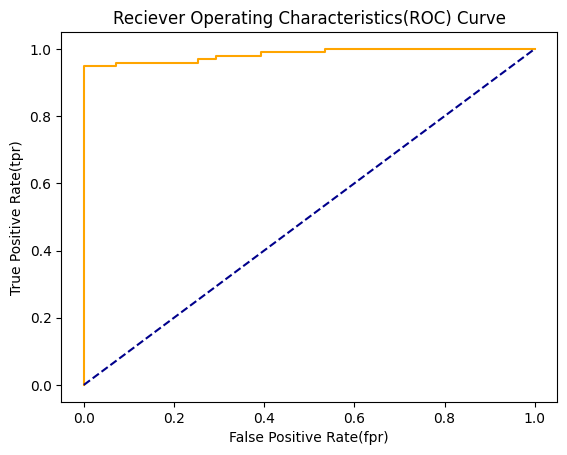

In [27]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    # Plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    plt.xlabel("False Positive Rate(fpr)")
    plt.ylabel("True Positive Rate(tpr)")
    plt.title("Reciever Operating Characteristics(ROC) Curve")
    
plot_roc_curve(fpr,tpr)

In [28]:
roc_auc_score(y_test,y_test_prob_positve)

0.984230055658627

<Axes: >

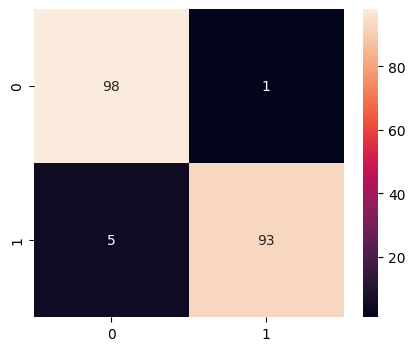

In [29]:
cm = confusion_matrix(y_test, X_test_predicted, labels = model.classes_)
plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True, xticklabels = model.classes_, yticklabels = model.classes_)

In [30]:
print("Accuracy Score:", model.score(X_test, y_test))

Accuracy Score: 0.9695431472081218


# Thank You!!!